<a href="https://colab.research.google.com/github/Fisail/Fisail/blob/main/SAE_graphes_coloration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAE sur les graphes : définition de plannings à l'aide de la coloration de sommets ou d'arêtes

Dans cette SAE sur les graphes, l'objectif est de pouvoir faire de la coloration de graphe, en utilisant l'algorithme de Welsh et Powell. La coloration de graphes sera utilisée pour établir des plannings, pour différentes applications.

La représentation choisie pour les graphes non-orientés est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit. Un tableau contenant le nom associé à chaque sommet sera également créé.


## Utilisation de graphviz pour visualiser les graphes

#### Installation de graphviz pour pouvoir visualiser les graphes

In [ ]:
%pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


('0.20.1', (2, 43, 0))

#### Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [ ]:
def creation_graphe_graphviz(g):
    # création d'un graphe non orienté
    dot = graphviz.Graph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arêtes
    for i in range(len(g)):
        for j in range(i):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

## Graphes non orientés

### Définition des fonctions utiles

#### Fonction qui construit un graphe vide (sans aretes), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [ ]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

#### Fonction qui donne le nombre de sommets du graphe

In [ ]:
def nb_sommet(graphe):
    return len(graphe)

#### Fonction qui retourne vrai si l'arete, dont les numéros de sommets extrémités sont donnés, existe

In [ ]:
def est_arete(g, i, j):
    return g[i][j] == 1

#### Fonction qui calcule le nombre d'arêtes du graphe

In [ ]:
def nb_aretes(graphe):  
    count = 0
    for i in range(len(graphe)):
        for j in range(i+1, len(graphe)):
            if est_arete(graphe, i, j):
               count += 1

    return count

#### Fonction qui calcule le degré d'un sommet

In [ ]:
def degre(g, i):
    res = 0
    for j in range(len(g[i])):
        if est_arete(g, i, j):
            res = res + 1  
    return res

### Quelques tests des fonctions

#### Définition d'un premier graphe

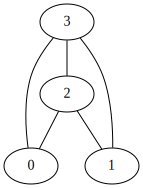

In [ ]:
graphe1 = [[0,0,1,1],
          [0,0,1,1],
          [1,1,0,1],
          [1,1,1,0]]

noms_sommets_graphe1 = {0:"Maths", 1:"Informatique", 2:"Anglais", 3:"Gestion"}

gdot1 = creation_graphe_graphviz(graphe1)
#print(gdot1.source)
gdot1

#### Définition d'un second graphe

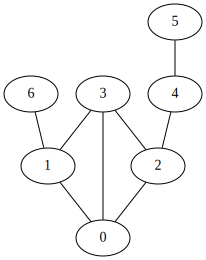

In [ ]:
graphe2 = [[0,1,1,1,0,0,0],
           [1,0,0,1,0,0,1],
           [1,0,0,1,1,0,0],
           [1,1,1,0,0,0,0],
           [0,0,1,0,0,1,0],
           [0,0,0,0,1,0,0],
           [0,1,0,0,0,0,0]]

noms_sommets_graphe2 = {0:"Thomas",1:"Anne",2:"Romain",3:"Delphine",4:"Lucas",5:"Marie",6:"Tom"}

gdot2 = creation_graphe_graphviz(graphe2)
#print(gdot2.source)
gdot2


#### Définition d'un troisieme graphe

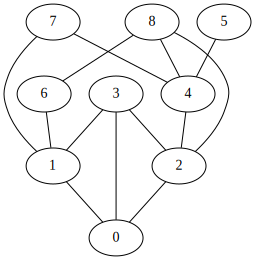

In [ ]:
graphe3 = [[0,1,1,1,0,0,0,0,0],
           [1,0,0,1,0,0,1,1,0],
           [1,0,0,1,1,0,0,0,0],
           [1,1,1,0,0,0,0,0,1],
           [0,0,1,0,0,1,0,0,0],
           [0,0,0,0,1,0,0,0,0],
           [0,1,0,0,0,0,0,1,0],
           [0,1,0,0,1,0,0,0,1],
           [0,0,1,0,1,0,1,0,0]]

noms_sommets_graphe2 = {0:"Thomas",1:"Anne",2:"Romain",3:"Delphine",4:"Lucas",5:"Marie",6:"Tom",7:"Roudy",8:"Nathan"}

gdot3 = creation_graphe_graphviz(graphe3)
#print(gdot2.source)
gdot3

## Coloration des sommets d'un graphe, sous la forme d'un dictionnaire, en utilisant l'algorithme de Welsh-Powell

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

#### Fonction qui trie les sommets selon leur degré décroissant et qui retourne la liste des sommets ainsi triée

In [ ]:
def tri_sommets(g):
    sommets_tries = []
    for i in range(len(g)):
        sommets_tries.append(i)

    for k in range(len(sommets_tries)):
        for j in range(len(sommets_tries) - 1):
            if degre(g, sommets_tries[j]) < degre(g, sommets_tries[j+1]):
                sommets_tries[j], sommets_tries[j+1] = sommets_tries[j+1], sommets_tries[j]

    return sommets_tries

In [ ]:
# test de la fonction tri_sommets
print("tri des sommets du graphe 1, selon leur degré décroissant")
print(tri_sommets(graphe1))

tri des sommets du graphe 1, selon leur degré décroissant
[2, 3, 0, 1]


#### Fonction qui affiche la coloration des sommets d'un graphe

Reprenez la fonction `creation_graphe_graphviz(g)` et regardez le projet graphviz pour Python (https://pypi.org/project/graphviz/) pour afficher les couleurs des sommets sur le graphe (vous pouvez également regarder la page https://graphviz.org/doc/info/colors.html, pour avoir les noms de couleurs utilisables). 
Le graphe avec les sommets coloriés est obtenu à partir de `graphe`, le graphe de départ, et de `coloration`, le dictionnaire contenant la coloration des sommets (obtenu en résultat de la fonction `coloration_sommets_welsh_powell(graphe)`).

In [ ]:
def affichage_couleurs_sommets_graphviz(graphe, coloration):
    # EN ATTENTE DE L AVIS DE ROUDY
    tab_color = ["red", "blue", "green", "yellow", "grey", "brown"]

    dot_col_som = graphviz.Graph()  # création d'un graphe vide
    
    for cle in coloration:
        for sommet in coloration[cle]:
            dot_col_som.node(str(sommet), color=tab_color[cle])
    
    for i in range(len(graphe)):
        for j in range(i+1, len(graphe[i])):
            if est_arete(graphe, i, j):
                dot_col_som.edge(str(i), str(j))

    return dot_col_som

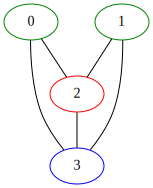

In [ ]:
# test de la fonction affichage_couleurs_sommets_graphviz


test1 = affichage_couleurs_sommets_graphviz(graphe1, {0: [2], 1: [3], 2 : [0,1]})

test1

### Fonction principale, pour la coloration de sommets

#### Fonction qui fait la coloration de sommets avec l'algorithme de Welsh-Powell
Le dictionnaire, retourné par la fonction, associe un numéro de couleur (clé du dictionnaire) et la liste des sommets de cette couleur (valeur du dictionnaire).

In [ ]:
def coloration_sommets_welsh_powell(graphe):
    couleurs = {}
    sommets_tries = tri_sommets(graphe)
    nb_couleur = 0

    for sommet_courant in sommets_tries :                
        if not est_deja_colorier(graphe,couleurs,sommet_courant) :
            couleurs[nb_couleur] = [sommet_courant]

            for autres_sommets in sommets_tries :                        
                if not est_arete(graphe,sommet_courant, autres_sommets) and \
                    not est_voisin_avec_autre(graphe, autres_sommets,couleurs[nb_couleur]) and \
                    not est_deja_colorier(graphe, couleurs,autres_sommets) :
                    couleurs[nb_couleur].append(autres_sommets)
            nb_couleur += 1
    return couleurs

In [ ]:
def est_deja_colorier(graphe, couleur,sommet) :
    for nb_couleur in couleur.keys() :
        if sommet in couleur[nb_couleur] :
            return True 
    return False

In [ ]:
def est_voisin_avec_autre(graphe, sommet, sommet_colorie) :
    for autre_sommet in sommet_colorie :
        if est_arete(graphe,sommet,autre_sommet) or est_arete(graphe,autre_sommet,sommet):
            return True
    return False

In [ ]:
# test de la fonction coloration_sommets_welsh_powell
print("coloration des sommets du graphe")
couleurs_sommets = coloration_sommets_welsh_powell(graphe1)
print(couleurs_sommets)

coloration des sommets du graphe
{0: [2], 1: [3], 2: [0, 1]}


### Tests permettant l'utilisation des fonctions affichage_couleurs_sommets_graphviz et coloration_sommets_welsh_powell

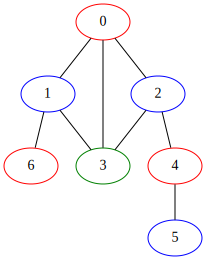

In [ ]:
test_graphe_1 = affichage_couleurs_sommets_graphviz(graphe1, coloration_sommets_welsh_powell(graphe1))
test_graphe_2 = affichage_couleurs_sommets_graphviz(graphe2, coloration_sommets_welsh_powell(graphe2))

test_graphe_2

## Coloration des arêtes d'un graphes, sous la forme d'un dictionnaire, en utilisant l'algorithme de Welsh-Powell

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

#### Fonction qui construit le graphe aux arêtes correspondant au graphe donné.
Les noms des sommets, dans le graphe aux arêtes, sont des tuples contenant les 2 numéros de sommets composant l'arête. La fonction retourne à la fois la matrice correspondant au graphe aux arêtes (variable `g_aretes`) et le dictionnaire donnant la correspondance entre chaque numéro de sommet dans le graphe aux arêtes et le nom de l'arête qu'il représente (variable `dict_aretes`).

In [ ]:
def graphe_aux_aretes(graphe):
    g_aretes = graphe_vide(nb_aretes(graphe))
    dict_aretes = {}
    
    # à compléter
    
    return (g_aretes, dict_aretes)

In [ ]:
# test de la fonction graphe_aux_aretes

#### Fonction qui affiche la coloration des arêtes d'un graphe

Reprenez la fonction `creation_graphe_graphviz(g)` et regardez le projet graphviz pour Python (https://pypi.org/project/graphviz/) pour afficher les couleurs des arêtes sur le graphe (vous pouvez également regarder la page https://graphviz.org/doc/info/colors.html, pour avoir les noms de couleurs utilisables). 
Le graphe avec les arêtes coloriées est obtenu à partir de `graphe`, le graphe de départ, et de `coloration`, la coloration des arêtes donnée sous la forme d'un dictionnaire (obtenu en résultat de la fonction `coloration_aretes_welsh_powell(graphe)`).

In [ ]:
def affichage_couleurs_aretes_graphviz(graphe, coloration):
    # création d'un graphe non orienté, avec des arêtes coloriés
    dot_col_aretes = graphviz.Graph()
    
    # compléter
    
    return dot_col_aretes

In [ ]:
# test de la fonction affichage_couleurs_aretes_graphviz

### Fonction principale, pour la coloration d'arêtes

#### Fonction qui fait la coloration d'arêtes, avec l'algorithme de Welsh-Powell

Le dictionnaire, retourné par la fonction, associe un numéro de couleur (clé du dictionnaire) et la liste des arêtes de cette couleur (valeur du dictionnaire). Une arête est définie par un tuple contenant les 2 numéros de sommets composant l'arête.

In [ ]:
def coloration_aretes_welsh_powell(graphe):
    couleurs = {}
    
    # à compléter
    
    return couleurs

In [ ]:
# test de la fonction coloration_aretes_welsh_powell

## Résolution de problèmes de plannings à l'aide de la coloration de graphes

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

#### Affichage du planning donné par le dictionnaire `dico_planning`
Les clés du dictionnaire correspondent aux noms des créneaux et les valeurs aux événements ayant lieu durant chaque créneau.

In [ ]:
def affichage_planning(dico_planning):
    for key, value in dico_planning.items() :
        print(key, "--->", value)

In [ ]:
# test de la fonction affichage_planning

### Fonctions principales, pour la création de plannings à l'aide de la coloration de graphes

#### Fonction qui crée un planning de rattrapage des examens, à partir du graphe `graphe`, définissant les incompatibilités entre les examens (c'est-à-dire les examens ne pouvant pas avoir lieu en même temps)
`noms_sommets` correspond aux noms des sommets (c'est-à-dire des examens) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [ ]:
def creation_planning_rattrapages(graphe, noms_sommets, noms_couleurs):
    planning = {}
    res_coloration = coloration_sommets_welsh_powell(graphe)
    print(res_coloration)
    for key, value in res_coloration.items() :
        planning[noms_couleurs[key]] = [noms_sommets[sommet] for sommet in value]
    return planning

{0: [2, 1, 5], 1: [3, 8], 2: [6, 4], 3: [7, 0]}
1er demi-journée ---> ['AAL', 'DLIL', 'RSL']
2ème demi-journée ---> ['AAC', 'SSLM']
3ème demi-journée ---> ['RL', 'FT']
4éme demi-journée ---> ['TA', 'Cor']


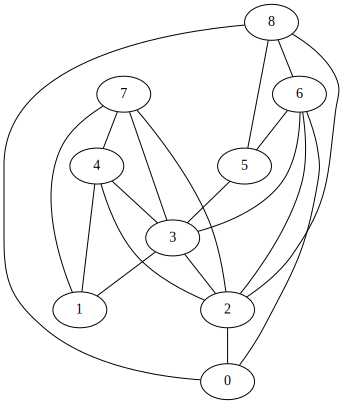

In [ ]:
# test de la fonction creation_planning_rattrapages et affichage du planning obtenu
noms_sommets = ['Cor', 'DLIL', 'AAL', 'AAC', 'FT', 'RSL', 'RL', 'TA', 'SSLM']
noms_couleurs = ['1er demi-journée', '2ème demi-journée', '3ème demi-journée', '4éme demi-journée', '5ème demi-journée', '6ème demi-journée', '7ème demi-journée', '8ème demi-journée', '9ème demi-journée', '10ème demi-journée']
graphe_examan = [[0,0,1,0,0,0,1,0,1],
                 [0,0,0,1,1,0,0,1,0],
                 [1,0,0,1,1,0,1,1,1],
                 [0,1,1,0,1,1,1,1,0],
                 [0,1,1,1,0,0,0,1,0],
                 [0,0,0,1,0,0,1,0,1],
                 [1,0,1,1,0,1,0,0,1],
                 [0,1,1,1,1,0,0,0,0],
                 [1,0,1,0,0,1,1,0,0]]
graphe_ex_affichage = creation_graphe_graphviz(graphe_examan)
affichage_planning(creation_planning_rattrapages(graphe_examan,noms_sommets,noms_couleurs))
graphe_ex_affichage

#### Fonction qui crée un planning de *job dating*, à partir du graphe `graphe`, définissant les liens entre les étudiants et les entreprises choisies par eux
`noms_sommets` correspond aux noms des  (c'est-à-dire des étudiants et des entreprises) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [ ]:
def creation_planning_job_dating(graphe, noms_sommets, noms_couleurs):
    planning = {}
    
    # à compléter 
    
    return planning

In [ ]:
# test de la fonction creation_planning_job_dating et affichage du planning obtenu

#### Fonction qui crée un planning des matchs de badminton d'une journée de championnat, à partir du graphe `graphe`, représentant les incompatibilités entre les matchs (c'est-à-dire les matchs qui ne peuvent pas être joués en même temps car ils comportent un joueur commun)
`noms_sommets` correspond aux noms des sommets (c'est-à-dire des matches) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [ ]:
def creation_planning_badminton(graphe, noms_sommets, noms_couleurs):
    planning = {}
    
    # à compléter 
    
    return planning

In [ ]:
# test de la fonction creation_planning_badminton et affichage du planning obtenu

### Utilisation des fonctions précédentes pour résoudre les problèmes associés, à partir de graphes à construire
A remplir à partir des exemples donnés dans le sujet de SAE.

#### Organisation de rattrapages d'examens

In [ ]:
# cellules de code à écrire

#### Organisation de sessions de *job meeting*

In [ ]:
# cellules de code à écrire

#### Planification des matchs d'une rencontre de championnat de badminton

In [ ]:
# cellules de code à écrire

#### Planification des matchs d'une rencontre supplémentaire de championnat de badminton

Journée de championnat choisie : <donnez le numéro de la journée et les 2 équipes concernées ainsi que le lien vers la page de la ffbd>

In [ ]:
# cellules de code à écrire